##### 1. 필요 라이브러리 및 파일 불러오기

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

In [2]:
file_path = './match_2018.csv'

# Import a CSV file and convert it to a pandas dataframe
try:
    matchData = pd.read_csv(file_path)
    message = "Dataframe has been successfully created."
except Exception as e:
    matchData = None
    message = f"Dataframe creation has been failed: {e}"

print(message)

Dataframe has been successfully created.


In [3]:
file_path = './hitter_2018.csv'

# Import a CSV file and convert it to a pandas dataframe
try:
    hitterData = pd.read_csv(file_path)
    message = "Dataframe has been successfully created."
except Exception as e:
    hitterData = None
    message = f"Dataframe creation has been failed: {e}"

print(message)

Dataframe has been successfully created.


In [4]:
file_path = './pitcher_2018.csv'

# Import a CSV file and convert it to a pandas dataframe
try:
    pitcherData = pd.read_csv(file_path)
    message = "Dataframe has been successfully created."
except Exception as e:
    pitcherData = None
    message = f"Dataframe creation has been failed: {e}"

print(message)

Dataframe has been successfully created.


In [5]:
print(matchData.shape)
print(hitterData.shape)
print(pitcherData.shape)

(721, 7)
(18224, 17)
(6258, 24)


##### 2. 데이터 전처리

In [7]:
def generate_matchID(match_date, home_team, away_team, year):
    team_mapping = {
        '롯데': 'LT',
        'SSG': 'SK',
        '한화': 'HH',
        '키움': 'WO',
        '삼성': 'SS',
        'NC': 'NC',
        'LG': 'LG',
        'KIA': 'HT',
        '두산': 'OB',
        'KT': 'KT'
    }

    home_team_id = team_mapping.get(home_team, 'XX')  # 홈팀이 없는 경우 'XX'를 사용
    away_team_id = team_mapping.get(away_team, 'XX')

    # match_date를 문자열로 변환하여 앞 8자리를 가져오고, home_team_id를 뒤에 2자리에 추가하고, 연도를 마지막 4자리에 추가
    match_id = match_date.strftime('%Y%m%d')[:8] + away_team_id + home_team_id + '0' + str(year)

    return match_id

# 예제 사용:

match_date = datetime(2018, 4, 26)
home_team = '한화'
away_team = '키움'
year = 2018
match_id = generate_matchID(match_date, home_team, away_team, year)
print(match_id)

20180426WOHH02018


In [8]:
# 'Unnamed: 0' 열을 활용하여 matchID 생성 및 열 대체
matchData['matchID'] = matchData.apply(lambda row: generate_matchID(pd.Timestamp(2018, row['월'], row['일']), row['홈'], row['원정'], 2018), axis=1)

# 'Unnamed: 0' 열 제거
matchData.drop(columns=['Unnamed: 0'], inplace=True)

# 결과 확인
print(matchData)

      월   일  원정    홈  원정점수  홈점수            matchID
0     3  24  한화   키움     3    6  20180324HHWO02018
1     3  24  KT  KIA     5    4  20180324KTHT02018
2     3  24  LG   NC     2    4  20180324LGNC02018
3     3  24  롯데  SSG     5    6  20180324LTSK02018
4     3  24  삼성   두산     6    3  20180324SSOB02018
..   ..  ..  ..  ...   ...  ...                ...
716  10  13  LG  SSG     3    2  20181013LGSK02018
717  10  13  롯데  KIA     5    1  20181013LTHT02018
718  10  13  NC   한화     8   10  20181013NCHH02018
719  10  13  키움   삼성     5   12  20181013WOSS02018
720  10  14  두산   롯데     5    1  20181014OBLT02018

[721 rows x 7 columns]


In [25]:
# '롯데' 팀 데이터 필터링
ltMatchData = matchData[(matchData['원정'] == '롯데') | (matchData['홈'].str.contains('롯데'))]
ltMatchData = ltMatchData.reset_index(drop=True)
print(ltMatchData.shape)

# 'SSG' 팀 데이터 필터링
skMatchData = matchData[(matchData['원정'] == 'SSG') | (matchData['홈'].str.contains('SSG'))]
skMatchData = skMatchData.reset_index(drop=True)
print(skMatchData.shape)

# '한화' 팀 데이터 필터링
hhMatchData = matchData[(matchData['원정'] == '한화') | (matchData['홈'].str.contains('한화'))]
hhMatchData = hhMatchData.reset_index(drop=True)
print(hhMatchData.shape)

# '키움' 팀 데이터 필터링
woMatchData = matchData[(matchData['원정'] == '키움') | (matchData['홈'].str.contains('키움'))]
woMatchData = woMatchData.reset_index(drop=True)
print(woMatchData.shape)

# '삼성' 팀 데이터 필터링
ssMatchData = matchData[(matchData['원정'] == '삼성') | (matchData['홈'].str.contains('삼성'))]
ssMatchData = ssMatchData.reset_index(drop=True)
print(ssMatchData.shape)

# 'NC' 팀 데이터 필터링
ncMatchData = matchData[(matchData['원정'] == 'NC') | (matchData['홈'].str.contains('NC'))]
ncMatchData = ncMatchData.reset_index(drop=True)
print(ncMatchData.shape)

# 'LG' 팀 데이터 필터링
lgMatchData = matchData[(matchData['원정'] == 'LG') | (matchData['홈'].str.contains('LG'))]
lgMatchData = lgMatchData.reset_index(drop=True)
print(lgMatchData.shape)

# 'KIA' 팀 데이터 필터링
htMatchData = matchData[(matchData['원정'] == 'KIA') | (matchData['홈'].str.contains('KIA'))]
htMatchData = htMatchData.reset_index(drop=True)
print(htMatchData.shape)

# '두산' 팀 데이터 필터링
obMatchData = matchData[(matchData['원정'] == '두산') | (matchData['홈'].str.contains('두산'))]
obMatchData = obMatchData.reset_index(drop=True)
print(obMatchData.shape)

# 'KT' 팀 데이터 필터링
ktMatchData = matchData[(matchData['원정'] == 'KT') | (matchData['홈'].str.contains('KT'))]
ktMatchData = ktMatchData.reset_index(drop=True)
print(ktMatchData.shape)


(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)
(144, 7)


##### A. 선발투수 관련 분석

In [28]:
# 팀 약어 목록
team_abbreviations = ['LT', 'SK', 'HH', 'WO', 'SS', 'NC', 'LG', 'HT', 'OB', 'KT']

# 각 팀별로 첫 번째 선발투수 데이터를 저장할 빈 데이터프레임 생성
first_pitchers_by_team = {team_abbr: pd.DataFrame() for team_abbr in team_abbreviations}

# 각 팀에 대한 데이터프레임을 순회하며 첫 번째 선발투수 데이터 추출
for team_abbr in team_abbreviations:
    match_data = globals()[f'{team_abbr.lower()}MatchData']
    for _, row in match_data.iterrows():
        matchid = row['matchID']
        team_part = matchid[8:]
        away_team = team_part[:2]

        # 해당 팀이 원정팀인 경우
        if away_team == team_abbr: 
            team_pitchers = pitcherData[(pitcherData['matchid'] == matchid) & (pitcherData['경기장'] == '원정')]
        # 해당 팀이 홈팀인 경우
        else:
            team_pitchers = pitcherData[(pitcherData['matchid'] == matchid) & (pitcherData['경기장'] == '홈')]

        # 첫 번째 선발투수 데이터가 있는 경우 해당 팀의 데이터프레임에 추가
        if not team_pitchers.empty:
            first_pitchers_by_team[team_abbr] = pd.concat([first_pitchers_by_team[team_abbr], team_pitchers.iloc[[0]]], ignore_index=True)

# 결과 확인 (예시: 'LT' 팀의 첫 번째 선발투수 데이터의 첫 행 출력)
print(first_pitchers_by_team['LT'])

     Unnamed: 0   투수명   이닝  피안타  실점  자책  4사구  삼진  피홈런  타자  ...   패전  세이브  \
0          4262  듀브론트    4    5   5   4    6   2    0  24  ...  0.0  0.0   
1          4308   윤성빈    5    5   2   2    5   6    1  23  ...  1.0  0.0   
2          4356   레일리    5    5   3   3    4   7    0  23  ...  1.0  0.0   
3          4398   김원중    5    2   3   3    5   5    1  23  ...  0.0  0.0   
4          4440   송승준    5    7   4   3    2   5    0  24  ...  1.0  0.0   
..          ...   ...  ...  ...  ..  ..  ...  ..  ...  ..  ...  ...  ...   
137        2986   송승준  2 ⅔    6   8   8    4   3    0  18  ...  4.0  0.0   
138        3049   노경은    6    3   0   0    1   4    0  21  ...  6.0  0.0   
139        3065   김원중    5    3   3   2    2   2    0  21  ...  7.0  0.0   
140        3115   김건국    5    6   1   1    1   3    0  19  ...  0.0  0.0   
141        3141   송승준  5 ⅓    1   0   0    1   0    0  17  ...  4.0  0.0   

     평균자책    연도   월   일  소속팀  상대팀  경기장            matchid  
0    9.00  2018   3  24  SS

In [29]:
def parse_inning(inning_str):
    # 이닝 문자열을 공백으로 분할하여 정수 부분과 분수 부분을 분리합니다.
    parts = inning_str.split()

    # 정수 부분만 있는 경우 (예: "5")
    if len(parts) == 1:
        return float(parts[0])
    
    # 정수와 분수가 모두 있는 경우 (예: "2 ⅓")
    elif len(parts) == 2:
        whole_part = float(parts[0])  # 정수 부분
        fraction_part = parts[1]  # 분수 부분

        # 분수를 부동소수점 값으로 변환합니다.
        if fraction_part == '⅓':
            fraction_value = 0.3
        elif fraction_part == '⅔':
            fraction_value = 0.7
        else:
            # 지원되지 않는 분수 형태인 경우 오류를 발생시킵니다.
            raise ValueError(f"Unsupported fraction part: {fraction_part}")

        return whole_part + fraction_value

    else:
        # 잘못된 형식의 입력인 경우 오류를 발생시킵니다.
        raise ValueError(f"Invalid inning format: {inning_str}")

# 각 팀별 데이터프레임에 parse_inning 함수 적용
for team_abbr, df in first_pitchers_by_team.items():
    if '이닝' in df.columns:
        df['이닝'] = df['이닝'].apply(parse_inning)

# 결과 확인 (예시: 'HH' 팀의 변경된 '이닝' 열 출력)
print(first_pitchers_by_team['HH']['이닝'])

0      4.0
1      7.0
2      3.3
3      6.0
4      1.3
      ... 
139    5.0
140    4.0
141    2.0
142    5.3
143    0.7
Name: 이닝, Length: 144, dtype: float64


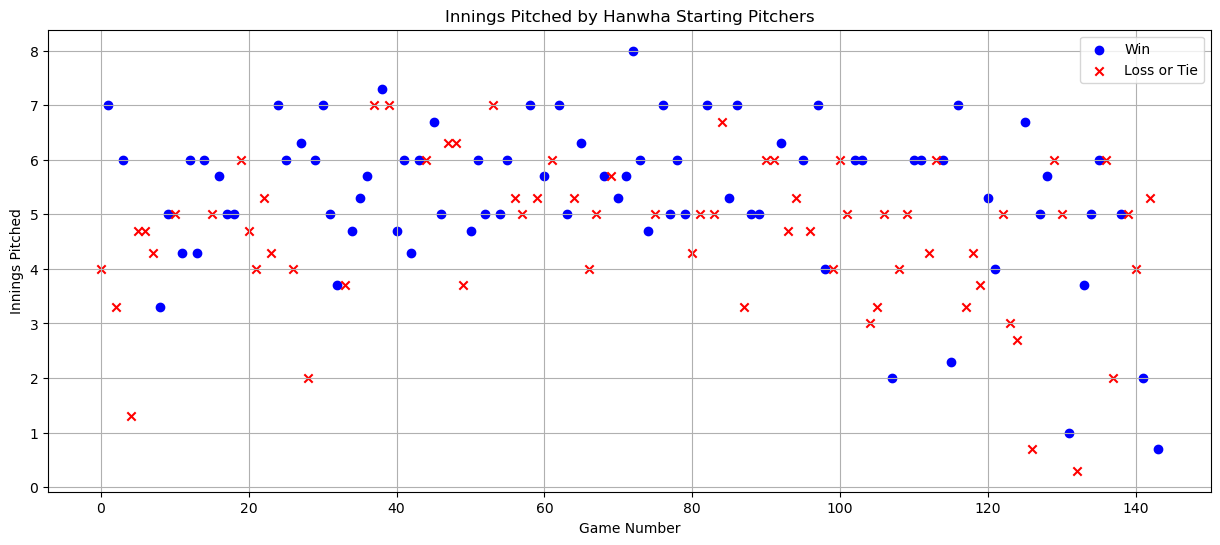

In [38]:
import matplotlib.pyplot as plt

# 한화가 이긴 경기와 그렇지 않은 경기를 구분
hhMatchData['한화 승리'] = (hhMatchData['원정'] == '한화') & (hhMatchData['원정점수'] > hhMatchData['홈점수']) | \
                         (hhMatchData['홈'] == '한화') & (hhMatchData['홈점수'] > hhMatchData['원정점수'])

# 그래프 생성
plt.figure(figsize=(15, 6))

# 한화가 이긴 경기
winning_games = first_pitchers_by_team['HH'][hhMatchData['한화 승리']]
plt.scatter(winning_games.index, winning_games['이닝'], marker='o', color='blue', label='Win')

# 한화가 지거나 비긴 경기
losing_games = first_pitchers_by_team['HH'][~hhMatchData['한화 승리']]
plt.scatter(losing_games.index, losing_games['이닝'], marker='x', color='red', label='Loss or Tie')

# 그래프 제목 및 축 레이블 설정
plt.title('Innings Pitched by Hanwha Starting Pitchers')
plt.xlabel('Game Number')
plt.ylabel('Innings Pitched')

# 그리드 및 범례 추가
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()


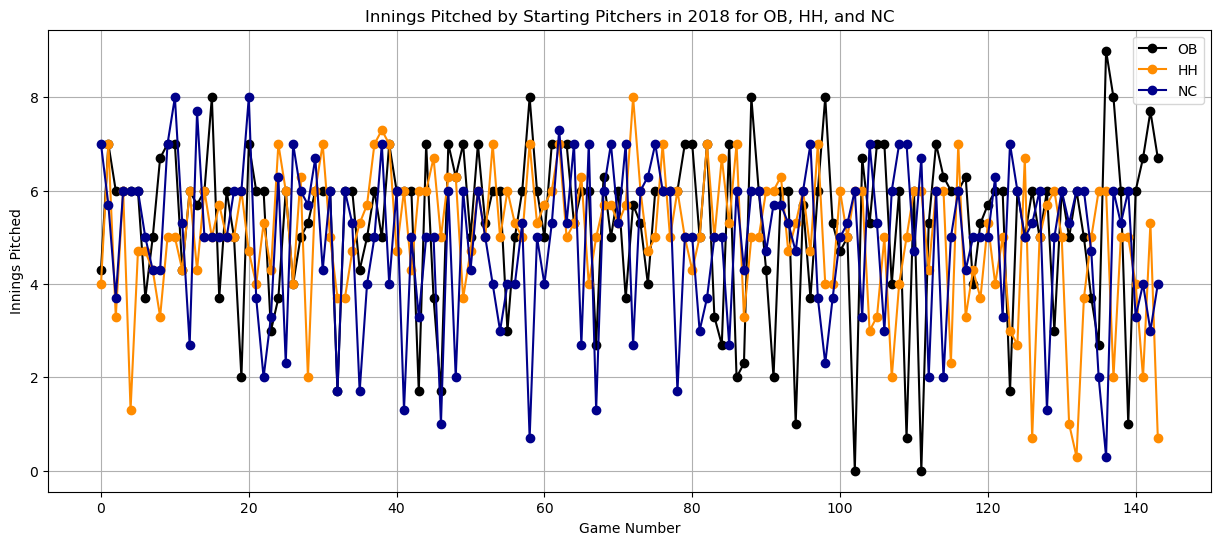

In [34]:
# 그래프 생성
plt.figure(figsize=(15, 6))

# 두산(검은색 선), 한화(노란색 선), NC(푸른색 선)에 대한 선 그래프
plt.plot(first_pitchers_by_team['OB']['이닝'], marker='o', linestyle='-', color='black', label='OB')
plt.plot(first_pitchers_by_team['HH']['이닝'], marker='o', linestyle='-', color='darkorange', label='HH')
plt.plot(first_pitchers_by_team['NC']['이닝'], marker='o', linestyle='-', color='darkblue', label='NC')

# 그래프 제목 및 축 레이블 설정
plt.title('Innings Pitched by Starting Pitchers in 2018 for OB, HH, and NC')
plt.xlabel('Game Number')
plt.ylabel('Innings Pitched')

# 그리드 및 범례 추가
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()

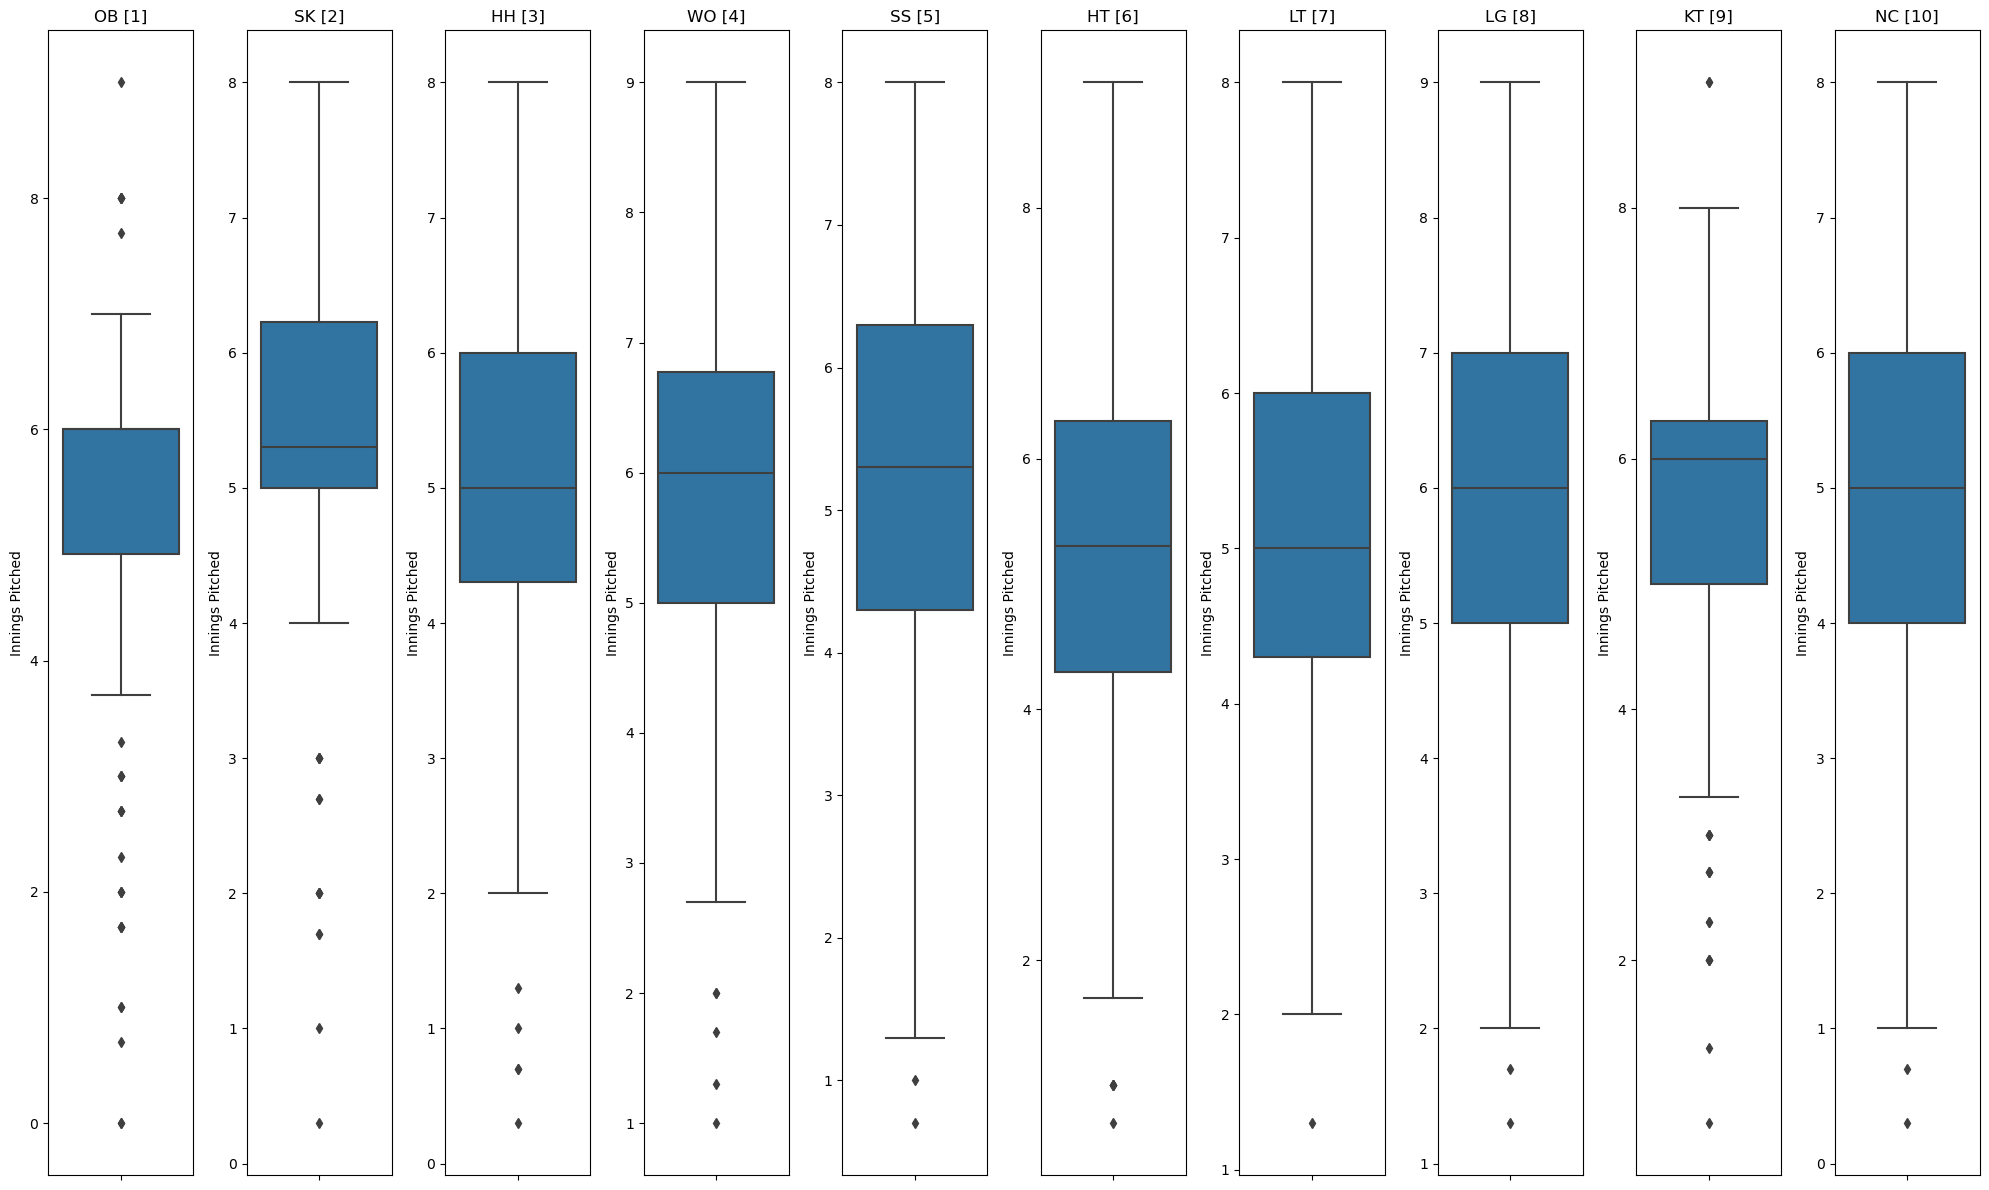

In [47]:
# 팀별 데이터프레임 추출
teams = ['OB', 'SK', 'HH', 'WO', 'SS', 'HT', 'LT', 'LG', 'KT', 'NC']
labels = ['OB [1]', 'SK [2]', 'HH [3]', 'WO [4]', 'SS [5]', 'HT [6]', 'LT [7]', 'LG [8]', 'KT [9]', 'NC [10]']
team_data = [first_pitchers_by_team[team]['이닝'] for team in teams]

# 3x2 격자 설정
fig, axes = plt.subplots(1, 10, figsize=(20, 12))

# 각 격자에 팀별 사분위수 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y=team_data[i], ax=ax)
    ax.set_title(labels[i])
    ax.set_ylabel('Innings Pitched')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

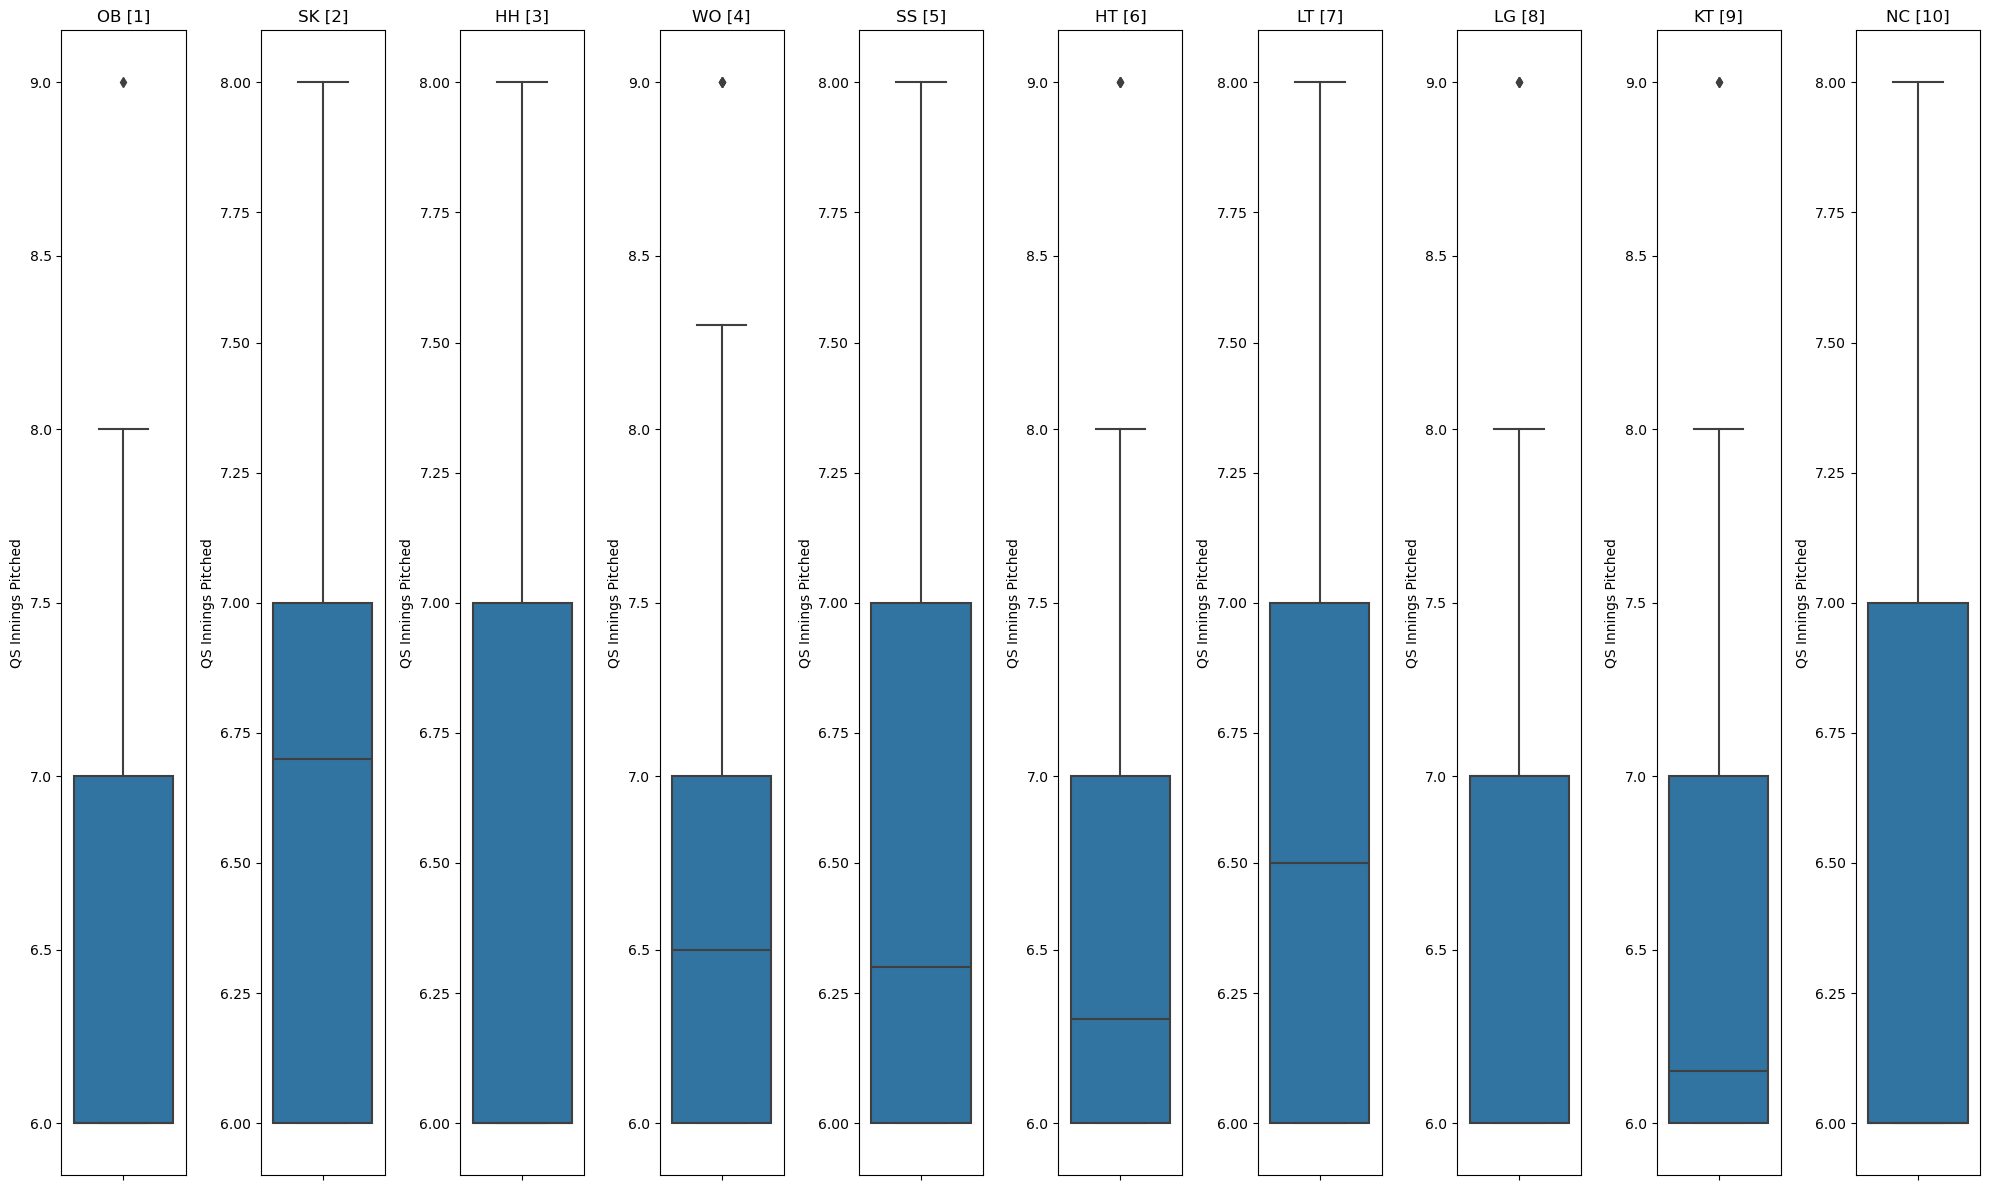

In [49]:
# 팀별 데이터프레임 추출 및 QS 이닝 필터링
teams = ['OB', 'SK', 'HH', 'WO', 'SS', 'HT', 'LT', 'LG', 'KT', 'NC']
labels = ['OB [1]', 'SK [2]', 'HH [3]', 'WO [4]', 'SS [5]', 'HT [6]', 'LT [7]', 'LG [8]', 'KT [9]', 'NC [10]']

# QS 이닝(6이닝 이상)만 필터링
qs_team_data = [first_pitchers_by_team[team][first_pitchers_by_team[team]['이닝'] >= 6] for team in teams]

# 1x10 격자 설정
fig, axes = plt.subplots(1, 10, figsize=(20, 12))

# 각 격자에 팀별 QS 이닝 사분위수 그래프 그리기
for i, ax in enumerate(axes):
    sns.boxplot(y=qs_team_data[i]['이닝'], ax=ax)
    ax.set_title(labels[i])
    ax.set_ylabel('QS Innings Pitched')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()